<a href="https://colab.research.google.com/github/hydrodan/MLE_MiniProjects/blob/main/Copy_of_Student_MLE_MiniProject_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini Project: Exploratory Data Analysis

# Exploratory Data Analysis: Unveiling Insights from the NYC Taxi Dataset

Data has become the lifeblood of the modern world, permeating every aspect of our lives and transforming the way we make decisions. In this era of vast information, the ability to extract meaningful insights from raw data has emerged as a crucial skill. Enter exploratory data analysis (EDA), a powerful approach that allows us to unravel hidden patterns, detect anomalies, and generate valuable knowledge from the vast volumes of data at our disposal.

Exploratory data analysis serves as the initial step in any data-driven investigation, offering a comprehensive understanding of the dataset's structure, distributions, and relationships between variables. By applying statistical and visual techniques, analysts gain a deeper insight into the data, paving the way for more accurate predictions, informed decision-making, and the discovery of actionable insights.

To illustrate the significance of exploratory data analysis, we delve into one of the most popular and widely studied datasets in the field—the [NYC Taxi Dataset](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page). As the name suggests, this dataset captures detailed information about taxi trips within the bustling city of New York. The NYC Taxi Dataset is an ideal choice for learning and practicing EDA techniques due to its richness, complexity, and real-world applicability.

The dataset encompasses a vast range of attributes, including pickup and drop-off locations, timestamps, trip durations, passenger counts, payment information, and much more. By exploring this data, we can gain valuable insights into the dynamics of taxi usage, understand travel patterns across different neighborhoods, identify peak hours of demand, analyze fare structures, and even uncover interesting anecdotes about the city's vibrant life.

The NYC Taxi Dataset is an excellent resource for aspiring ML practitioners to develop their EDA skills. Its scale, complexity, and real-world relevance make it an engaging playground for uncovering hidden patterns, generating hypotheses, and forming data-driven narratives.

In this mini project, we will dive deep into the NYC Taxi Dataset. We will leverage various EDA techniques to unveil meaningful insights, visualize data distributions, identify outliers, and pose insightful questions that will fuel further analysis and exploration. By the end of this colab, students will have a solid foundation in exploratory data analysis and be equipped to tackle real-world data challenges with confidence.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow.parquet as pq

In [2]:
!pwd
!ls -al


/mnt/c/Stuff/code/mlclass/mec2-projects
total 38960
drwxrwxrwx 1 dan dan     4096 Jul 15 15:37 .
drwxrwxrwx 1 dan dan     4096 Jul  7 19:39 ..
-rwxrwxrwx 1 dan dan  1396373 Jul 15 15:37 Copy_of_Student_MLE_MiniProject_EDA.ipynb
drwxrwxrwx 1 dan dan     4096 Jul  9 10:34 .git
-rwxrwxrwx 1 dan dan       32 Jul  9 10:15 .gitignore
drwxrwxrwx 1 dan dan     4096 Jul 15 10:06 .idea
-rwxrwxrwx 1 dan dan     1139 Jul  9 10:27 README.md
-rwxrwxrwx 1 dan dan     1880 Jul  6 21:41 Student_MLE_MiniProject_Churn_Prediction_AWS.md
-rwxrwxrwx 1 dan dan    17707 Jul  6 21:41 Student_MLE_MiniProject_Deep_Learning.ipynb
-rwxrwxrwx 1 dan dan   196135 Jul  9 10:27 Student_MLE_MiniProject_EDA.ipynb
-rwxrwxrwx 1 dan dan    15567 Jul  6 21:41 Student_MLE_MiniProject_Fine_Tuning.ipynb
-rwxrwxrwx 1 dan dan    15368 Jul  6 21:41 Student_MLE_MiniProject_Flask.ipynb
-rwxrwxrwx 1 dan dan    20937 Jul  6 21:41 Student_MLE_MiniProject_Logistic_Regression.ipynb
-rwxrwxrwx 1 dan dan    24772 Jul  6 21:41 Student_MLE_M

Load the NYC taxi dataset into a Pandas DataFrame and do a few basic checks to ensure the data is loaded properly. Note, there are several months of data that can be used. For simplicity, use the Yellow Taxi 2022-01 parquet file [here](https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2022-01.parquet). Here are your tasks:

  1. Load the `yellow_tripdata_2022-01.parquet` file into Pandas.
  2. Print the first 5 rows of data. Study the schema and make sure you understand what each of the fields mean by referencing the [documentation](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf).
  3. How many rows are in the dataset? How many unique columns are in the dataset?
  4. Which columns have NULL values and how many NULL values are present in each of these columns?
  5. Generate summary statistics using Pandas' [describe method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html). Do you notice anything unusual in the dataset? Find at least one anomoly and try to come up with a hypothesis to explain it.  
  6. Drop all rows with NULL values and store the result. We'll ignore NULL valued rows in this mini-project.


In [3]:
# Load parquet file into a Pandas DataFrame
tripdata = pq.read_table('yellow_tripdata_2022-01.parquet')
tripdata = tripdata.to_pandas()
tripdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463931 entries, 0 to 2463930
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [4]:
# Display the first few rows of the dataset
tripdata.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0


In [5]:
# Display the shape of the dataset
tripdata.shape

(2463931, 19)

In [6]:
# Check for missing values
tripdata.isna().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          71503
trip_distance                0
RatecodeID               71503
store_and_fwd_flag       71503
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     71503
airport_fee              71503
dtype: int64

In [7]:
# Summary statistics of the dataset
tripdata.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,2.463931e+06,2463931,2463931,2.392428e+06,2.463931e+06,2.392428e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.392428e+06,2.392428e+06
mean,1.707819e+00,2022-01-17 01:19:51.689724,2022-01-17 01:34:04.421902,1.389453e+00,5.372751e+00,1.415507e+00,1.660768e+02,1.635807e+02,1.194449e+00,1.294648e+01,1.006710e+00,4.914539e-01,2.385696e+00,3.749773e-01,2.967234e-01,1.916937e+01,2.282322e+00,8.249935e-02
min,1.000000e+00,2008-12-31 22:23:09,2008-12-31 23:06:56,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-4.800000e+02,-4.500000e+00,-5.000000e-01,-1.252200e+02,-3.140000e+01,-3.000000e-01,-4.803000e+02,-2.500000e+00,-1.250000e+00
25%,1.000000e+00,2022-01-09 15:37:41,2022-01-09 15:50:50.500000,1.000000e+00,1.040000e+00,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,7.200000e-01,0.000000e+00,3.000000e-01,1.130000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,2022-01-17 12:11:45,2022-01-17 12:23:49,1.000000e+00,1.740000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.000000e+00,5.000000e-01,5.000000e-01,2.000000e+00,0.000000e+00,3.000000e-01,1.469000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,2022-01-24 13:49:37.500000,2022-01-24 14:02:51,1.000000e+00,3.130000e+00,1.000000e+00,2.340000e+02,2.360000e+02,1.000000e+00,1.400000e+01,2.500000e+00,5.000000e-01,3.000000e+00,0.000000e+00,3.000000e-01,2.002000e+01,2.500000e+00,0.000000e+00
max,6.000000e+00,2022-05-18 20:41:57,2022-05-18 20:47:45,9.000000e+00,3.061593e+05,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,4.010923e+05,3.350000e+01,1.659000e+01,8.888800e+02,1.933000e+02,3.000000e-01,4.010956e+05,2.500000e+00,1.250000e+00
std,5.021375e-01,NaN,NaN,9.829686e-01,5.478714e+02,5.917573e+00,6.546806e+01,7.079016e+01,5.001778e-01,2.558149e+02,1.236226e+00,8.291560e-02,2.830698e+00,1.680538e+00,4.374741e-02,2.559641e+02,7.432040e-01,3.125554e-01


In [8]:
# Drop rows with missing values.
# take out the inf values
tripdata.replace([np.inf, -np.inf], np.nan, inplace=True)
tripdata.dropna(inplace=True)
tripdata.shape

(2392428, 19)

Feature engineering is a critical process in machine learning that involves selecting, transforming, and creating features from raw data to improve the performance and accuracy of predictive models. While machine learning algorithms have the capability to automatically learn patterns from data, the quality and relevance of the features used as inputs greatly influence the model's ability to generalize and make accurate predictions. Feature engineering, therefore, plays a crucial role in extracting meaningful information and representing it in a format that best captures the underlying relationships within the data.

Here are your tasks:

  1. Create a new feature that calculates the trip duration in minutes.
  2. Create additional features for the pick-up day of week and pick-up hour.
  3. Use the Seaborn library to create a [line plot](https://seaborn.pydata.org/generated/seaborn.lineplot.html) depicting the number of trips as a function of the hour of day. What's the busiest time of day?
  4. Create another lineplot depicting the number of trips as a function of the day of week. What day of the week is the least busy?

In [9]:
# Create a new column for trip duration in minutes
trip_duration = []
for i, x in tripdata.iterrows():
    trip_duration.append(round((x['tpep_dropoff_datetime'] - x['tpep_pickup_datetime']).total_seconds()/60.0, 2))
    # print(f"start date: {x['tpep_dropoff_datetime']}, end date: {x['tpep_dropoff_datetime']}, minutes: {trip_duration[i]}")

tripdata['duration_min'] = trip_duration

In [10]:
tripdata.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration_min
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0,17.82
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0,8.40
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0,8.97
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0,10.03
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0,37.53


In [11]:
tripdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2392428 entries, 0 to 2392427
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

In [12]:
# Create new columns for pickup hour and day of week
pick_hr_array = []
pickup_dow_array = []

for i, row in tripdata.iterrows():
  pick_hr_array.append(row['tpep_pickup_datetime'].hour)
  pickup_dow_array.append(row['tpep_pickup_datetime'].weekday())

tripdata['pickup_hr'] = pick_hr_array
tripdata['pickup_dow'] = pickup_dow_array

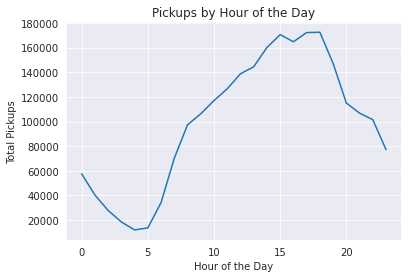

In [13]:
# Create a lineplot displaying the number of trips by pickup hour
pickup_hr_count = tripdata.groupby('pickup_hr')['VendorID'].count()
_= pickup_hr_count.plot()
plt.xlabel("Hour of the Day")
plt.ylabel("Total Pickups")
plt.title("Pickups by Hour of the Day")
plt.show()

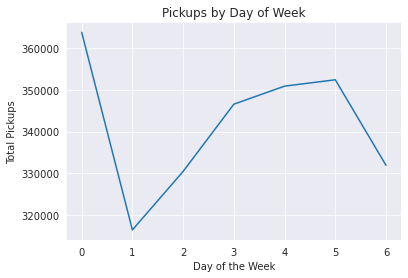

In [14]:
# Create a lineplot displaying the number of trips by pickup day
pickup_dow_count = tripdata.groupby('pickup_dow')['VendorID'].count()
_= pickup_dow_count.plot()
plt.xlabel("Day of the Week")
plt.ylabel("Total Pickups")
plt.title("Pickups by Day of Week")
plt.show()

In the realm of machine learning, understanding the relationships between variables is crucial for building accurate and effective predictive models. One powerful tool for exploring these relationships is the correlation matrix. A correlation matrix provides a comprehensive overview of the pairwise correlations between variables in a dataset, allowing practitioners to quantify and visualize the strength and direction of these associations. This matrix is an essential component of exploratory data analysis and offers several key benefits:

1. Relationship Assessment: The correlation matrix provides a quantitative measure of the relationship between variables. By calculating correlation coefficients, typically using methods like Pearson's correlation coefficient, analysts can determine if variables are positively correlated (increase together), negatively correlated (one increases as the other decreases), or uncorrelated (no systematic relationship). These measures offer insights into the direction and strength of the relationships, helping to identify important variables that may influence the target variable.

2. Feature Selection: Correlation matrices are invaluable in feature selection, which involves identifying the most relevant variables for building predictive models. By examining the correlations between the target variable and other features, analysts can identify highly correlated variables that may be strong predictors. This knowledge enables informed decisions regarding which variables to include in the model, potentially reducing dimensionality, enhancing model efficiency, and preventing issues such as multicollinearity.

3. Multicollinearity Detection: Multicollinearity occurs when two or more independent variables in a model are highly correlated. This can lead to problems such as instability in coefficient estimates, difficulty in interpreting feature importance, and reduced model robustness. By examining the correlation matrix, analysts can identify highly correlated variables and make informed decisions about which ones to include or exclude to mitigate multicollinearity. Removing redundant variables improves model interpretability and generalization.

Here is your task:

  1. Compute a correlation matrix between the variables 'trip_distance', 'fare_amount', 'tip_amount', 'total_amount', 'trip_duration' and use Seaborn to create a heatmap of the results. Which variables are strongly correlated?

               trip_distance  fare_amount  tip_amount  total_amount  \
trip_distance       1.000000     0.039426    0.491978      0.048724   
fare_amount         0.039426     1.000000    0.024196      0.999878   
tip_amount          0.491978     0.024196    1.000000      0.038133   
total_amount        0.048724     0.999878    0.038133      1.000000   
duration_min        0.165854     0.008134    0.086206      0.009720   

               duration_min  
trip_distance      0.165854  
fare_amount        0.008134  
tip_amount         0.086206  
total_amount       0.009720  
duration_min       1.000000  


<AxesSubplot:>

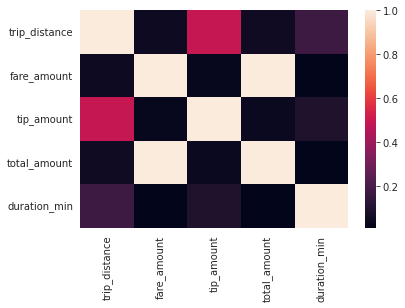

In [15]:
# Compute correlation matrix of numerical variables
m = tripdata[['trip_distance', 'fare_amount', 'tip_amount', 'total_amount', 'duration_min']].corr()
print(m)

# Create a heatmap of the correlation matrix
# reference: https://campus.datacamp.com/courses/dimensionality-reduction-in-python/feature-selection-i-selecting-for-feature-information?ex=9
sns.heatmap(m)

Pairplots, also known as scatterplot matrices, allow for the visualization of pairwise relationships between multiple variables simultaneously. Each subplot in the pairplot represents the scatterplot of one variable against another. Pairplots offer several advantages in EDA:

  - Variable Relationships: Pairplots enable analysts to explore the relationships between variables, revealing patterns such as linear or nonlinear correlations, clusters, or other associations. These visual cues guide further analysis, feature selection, or modeling decisions.

  - Multivariate Analysis: Pairplots help identify multivariate dependencies and interactions, highlighting how different variables jointly influence one another. This is particularly valuable in identifying potential confounding factors or discovering hidden interactions that may not be apparent when considering variables in isolation.

  - Outlier Detection: Pairplots can reveal potential outliers by showing data points that deviate significantly from the general pattern observed between variables. Outliers can indicate data anomalies or influential observations that may impact model performance.

  - Feature Importance: Pairplots provide an intuitive representation of the relative importance of different features. Variables exhibiting strong correlations or clear patterns may be more relevant for predictive modeling or feature selection.

  - Data Quality: Pairplots can help identify data quality issues, such as data entry errors or measurement inconsistencies. Patterns that do not align with expectations or exhibit unusual trends may signal data problems that require further investigation or preprocessing.

Here is your task:

  1. Create a [pairplot matrix](https://seaborn.pydata.org/generated/seaborn.pairplot.html) using Seaborn to observation the relationship between the following variables: trip_distance, fare_amount, tip_amount, total_amount, trip_duration. Note, pairplots can be memory intensive. Try sampling the dataset using the [sample method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html) in Pandas. Which variables appear to have a strong relationship? Which variables seem to have no relationship?

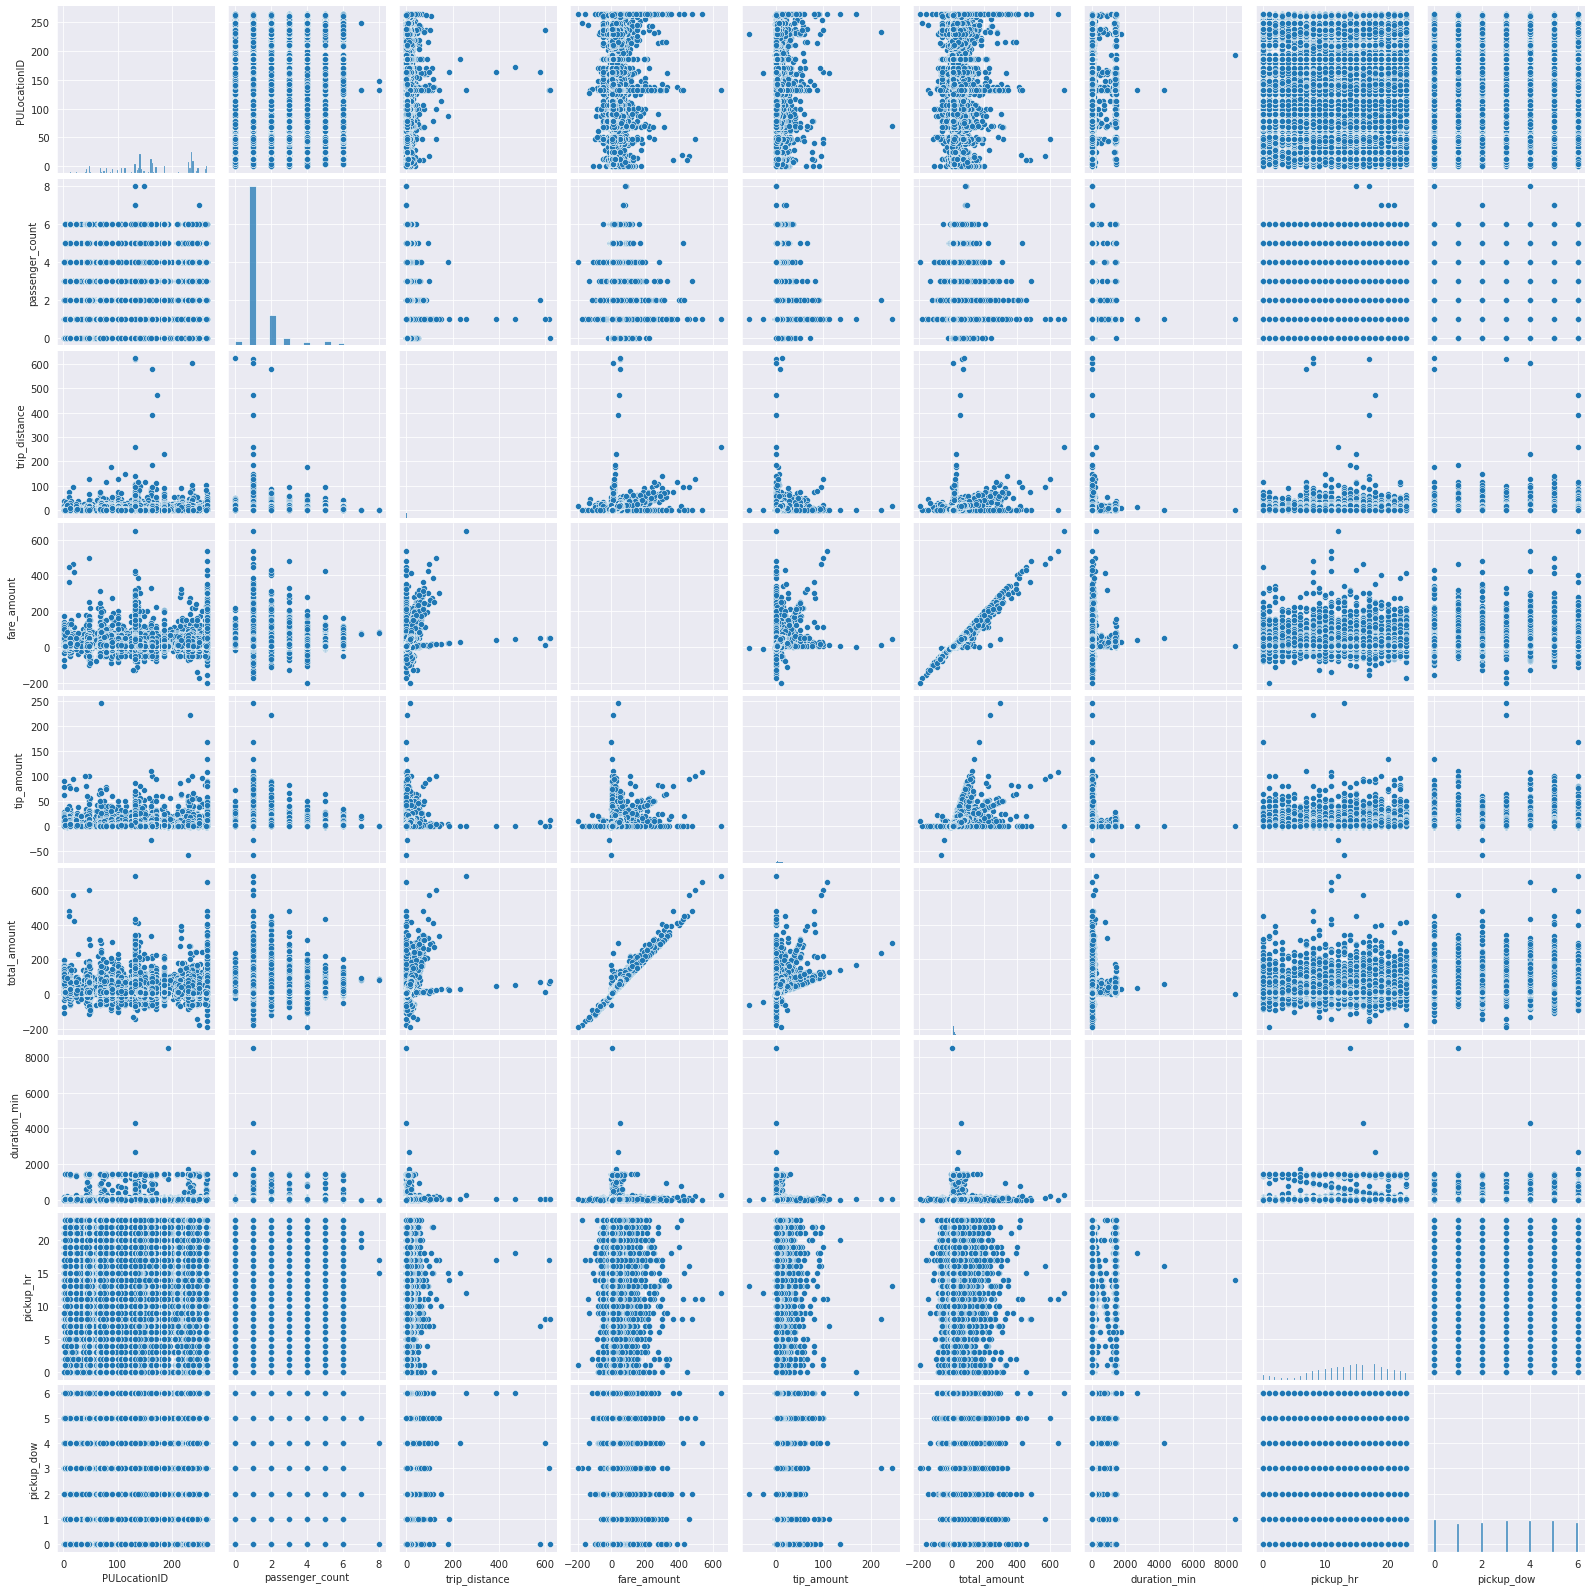

In [16]:
# Create a scatter plot matrix of numerical variables. If memory issues try the df.sample method.
# select only columns of interest
tripsubset = tripdata[['PULocationID', 'passenger_count','trip_distance', 'fare_amount', 'tip_amount', 'total_amount',  'duration_min', 'pickup_hr', 'pickup_dow']]

# subsample a third of the data to speed things up - script crashes with all data points
# using a seed for reproducibility
seed = 59543
tripsamples = tripsubset.sample(frac=0.3, random_state=seed)
sns.pairplot(tripsamples)


<H3> Exercise Question: Which variables appear to have a strong relationship? Which variables seem to have no relationship?</H3>
<UL>
    <LI>fare amount is highly correlated to total amount, as expected
    <LI>most of the data seems to contain outliers which skew the plots so heavily it's difficult to see correlations
    <LI>I would expect strong positive correlation between trip distance and fare amount, for example
</UL>

In [17]:
# Some outliers... 
max_distance = tripdata[tripdata['trip_distance'] == tripdata['trip_distance'].max()]
max_distance

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration_min,pickup_hr,pickup_dow
371455,1,2022-01-06 14:44:15,2022-01-06 15:42:49,2.0,651.0,2.0,N,68,132,1,...,0.5,16.55,0.0,0.3,71.85,2.5,0.0,58.57,14,3


In [18]:
# Some outliers...
max_fare = tripdata[tripdata['fare_amount'] == tripdata['fare_amount'].max()]
max_fare

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration_min,pickup_hr,pickup_dow
429859,1,2022-01-07 11:36:43,2022-01-07 11:47:12,1.0,3.3,1.0,N,107,140,4,...,0.5,0.0,0.0,0.3,401095.62,2.5,0.0,10.48,11,4


A count plot is a type of categorical plot that displays the number of occurrences of each category in a dataset. It is particularly useful for visualizing the distribution and frequency of categorical variables. Here are some key uses and benefits of count plots:

  - Categorical Variable Exploration: Count plots provide a quick and concise summary of the distribution of categorical variables. They allow analysts to understand the frequency or count of each category, revealing the proportions and imbalances within the dataset. This information is crucial for gaining insights into the composition and characteristics of categorical variables.

  - Class Imbalance Assessment: In classification tasks, count plots help assess the balance or imbalance of different target classes. It provides a visual representation of the distribution of classes, highlighting any significant discrepancies in the sample sizes across categories. Identifying imbalanced classes is important in machine learning as it can affect model performance and bias the predictions towards the majority class.

  - Data Quality Inspection: Count plots can be utilized to detect data quality issues in categorical variables. It allows analysts to identify unexpected or erroneous categories that may indicate data entry errors, missing data, or inconsistencies in the dataset. By observing the counts for each category, anomalies or discrepancies can be easily spotted, enabling data cleaning or further investigation if necessary.

  - Feature Importance Evaluation: Count plots can provide insights into the importance or relevance of different categorical features in relation to the target variable. By visualizing the distribution of categories within each class or target level, analysts can determine which categories are more prevalent or have higher frequencies for specific outcomes. This understanding helps in assessing the discriminatory power of categorical features and their potential impact on predictive models.

Here is your task:

  1. Use Seaborn to create a [countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html) for the variables PULocationID, and DOLocationID. Keep only the top 15 pick-up and drop-off locations. What's the most popular pick-up location? <b>Location 237</b>

In [19]:
# Get the 15 largest Drop off location IDs by number of trips
top_15_DOLoc = tripdata.groupby('DOLocationID')['DOLocationID'].sum().nlargest(15)
top_15_DOLoc

DOLocationID
236    28427852
237    24675492
239    17437918
263    15638243
238    15170358
229    12894303
230    12867350
234    12781782
170    12235070
161    11750424
262    11240062
141    10783398
249    10262286
142     9741484
162     9069570
Name: DOLocationID, dtype: int64

In [20]:
# Get the 15 largest Pick up location IDs by number of trips
top_15_PULoc = tripdata.groupby('PULocationID')['PULocationID'].sum().nlargest(15)
top_15_PULoc

PULocationID
237    28336668
236    27853900
239    17475680
263    15972253
230    15566630
186    14838150
234    14696838
161    13997340
238    13769728
132    13632564
249    13347147
170    12559430
229    12391648
162    11906352
142    11128966
Name: PULocationID, dtype: int64

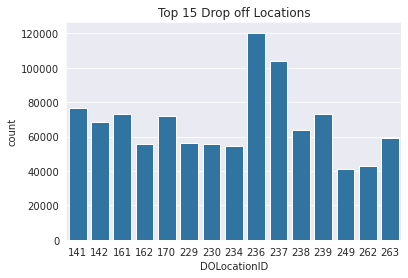

In [21]:
# Create a Seaborn countplot for PULocationID and DOLocationID. Only plot the top 15 categories by value counts.
_ = sns.countplot(tripdata[tripdata['DOLocationID'].isin(top_15_DOLoc.index[:])], x='DOLocationID')
_ = plt.title('Top 15 Drop off Locations')
plt.show()


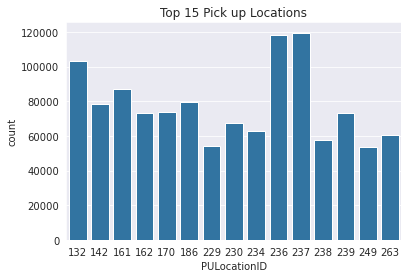

In [22]:
_ = sns.countplot(tripdata[tripdata['PULocationID'].isin(top_15_PULoc.index[:])], x='PULocationID')
_ = plt.title('Top 15 Pick up Locations')
plt.show()


A box plot, also known as a box-and-whisker plot, is a powerful visualization tool for displaying the distribution, variability, and outliers within a numerical dataset. It provides a concise summary of key statistical measures and offers several important uses:

  - Data Distribution and Skewness: Box plots offer a visual representation of the distribution of numerical data, providing insights into its central tendency, spread, and skewness. The box represents the interquartile range (IQR), which contains the middle 50% of the data, with the median indicated by a horizontal line within the box. By observing the length and symmetry of the box, analysts can assess whether the data is skewed or symmetrically distributed.

  - Outlier Detection: Box plots are highly effective in identifying outliers, which are data points that deviate significantly from the rest of the distribution. The whiskers of the plot extend to the minimum and maximum non-outlier values, with any data points beyond the whiskers considered as potential outliers. Outliers can indicate data errors, anomalies, or important observations requiring further investigation.

  - Comparing Groups or Categories: Box plots are useful for comparing the distributions of numerical data across different groups or categories. By creating side-by-side or grouped box plots, analysts can easily compare the central tendencies, spreads, and shapes of distributions between different groups. This allows for the identification of differences, similarities, or patterns within the data.

  - Variability and Spread: Box plots provide insights into the variability and spread of the data. The length of the box indicates the spread of the middle 50% of the data, while the whiskers show the range of non-outlier values. By comparing the lengths of the boxes and whiskers, analysts can assess the relative variability between different groups or categories, aiding in the understanding of the data's dispersion.

  - Skewedness and Symmetry: Box plots offer a visual assessment of the skewness or symmetry of the data distribution. A symmetrical distribution is represented by a box plot with an equal length on both sides of the median, while a skewed distribution is indicated by a longer box on one side. This visual cue helps in understanding the shape and characteristics of the data, assisting in further analysis and modeling decisions.

  - Data Range and Quartiles: Box plots display the quartiles of the data distribution. The lower quartile (Q1) represents the 25th percentile, the upper quartile (Q3) represents the 75th percentile, and the interquartile range (IQR) is the range between Q1 and Q3. These quartiles provide a summary of the range and spread of the central portion of the data, aiding in the understanding of the data's variability and dispersion.

Your task is:

  1. Use Seaborn's [boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html) to discern the relationship between payment_type and total_amount. Does anything look weird? Can you explain what's going on? <B> Answer: In payment type 4, there appears to be an erroneous value, of $400,000, which can't be correct for a taxi fare. I noticed this earlier when doing some manual outlier detection after seeing the scatter plots. After removing the outlier, it also appears there are a lot of negative fare values, which doesn't make sense.</b>

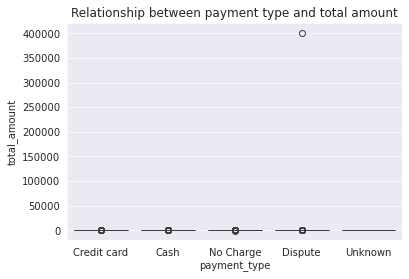

In [23]:
# Create a box plot of total amount by payment type. Do you see anything odd?
# labels from https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf
payment_label = ['Credit card', 'Cash', 'No Charge', 'Dispute', 'Unknown']

ax = sns.boxplot(tripdata, x='payment_type', y='total_amount')
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(payment_label)
_ = plt.title('Relationship between payment type and total amount')
plt.show()


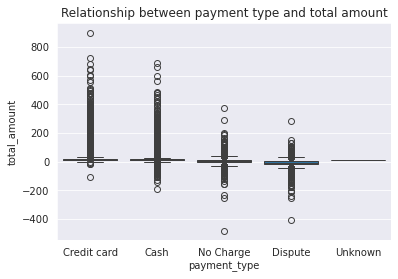

In [24]:
# After removing outlier
ax = sns.boxplot(tripdata.drop(max_fare.index), x='payment_type', y='total_amount')
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(payment_label)
_ = plt.title('Relationship between payment type and total amount')
plt.show()


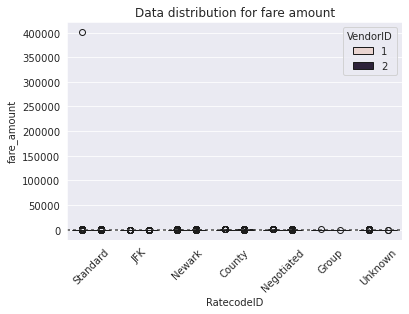

Median fare amount: 9.0, Mean: 12.807230763057447


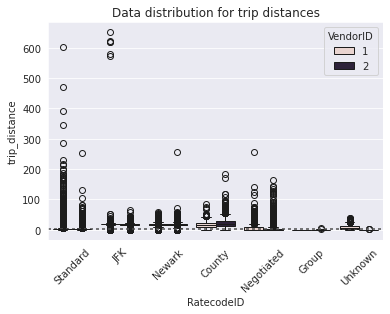

Median trip distance: 1.71, Mean: 3.0996980974976034


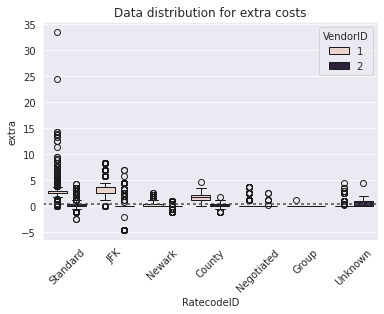

Median extra amount: 0.5, Mean: 1.0343005515735482


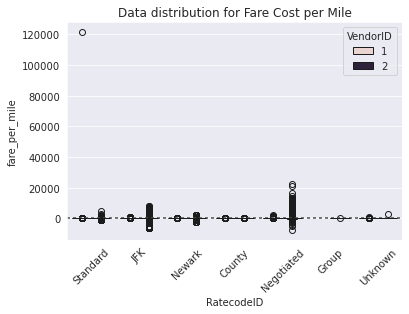

Median fare_per_mile: 8.168674698795181


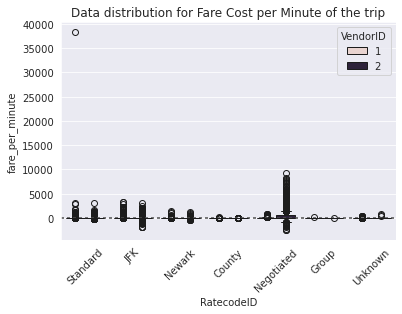

Median fare_per_minute: 1.5245202558635393


In [25]:
# Explore data distributions for 'fare_amount', 'trip_distance' and 'extra' using Seaborn's histplot.
# Sample the data if you run into memory issues.
# from the data dictionary, EXTRA = Miscellaneous extras and surcharges. Currently, this only includes the $0.50 and $1 rush hour and overnight charges; so it can be used a categorical column for in box plots

# Use the Rate Code to categorize
#rate_label = {1:'Standard', 2:'JFK', 3:'Newark', 4:'County', 5:'Negotiated', 6:'Group ride'}
rate_label = ['Standard', 'JFK', 'Newark', 'County', 'Negotiated', 'Group', 'Unknown']

# add columns for the cost per mile metric and cost per minute of travel
tripdata['fare_per_mile'] = tripdata['total_amount'] / tripdata['trip_distance']
tripdata['fare_per_minute'] = tripdata['total_amount'] / tripdata['duration_min']

ax = sns.boxplot(tripdata, x='RatecodeID', y='fare_amount', legend='auto', hue='VendorID')
ax.tick_params(axis='x', labelrotation=45)
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(rate_label)
ax.axhline(tripdata['fare_amount'].median(), color=".3", dashes=(2, 2))
_ = plt.title('Data distribution for fare amount')
plt.show()

print(f"Median fare amount: {tripdata['fare_amount'].median()}, Mean: {tripdata['fare_amount'].mean()}")

ax = sns.boxplot(tripdata, x='RatecodeID', y='trip_distance', legend='auto', hue='VendorID')
ax.tick_params(axis='x', labelrotation=45)
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(rate_label)
ax.axhline(tripdata['trip_distance'].median(), color=".3", dashes=(2, 2))
_ = plt.title('Data distribution for trip distances')
plt.show()

print(f"Median trip distance: {tripdata['trip_distance'].median()}, Mean: {tripdata['trip_distance'].mean()}")

ax = sns.boxplot(tripdata, x='RatecodeID', y='extra', legend='auto', hue='VendorID')
ax.tick_params(axis='x', labelrotation=45)
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(rate_label)
ax.axhline(tripdata['extra'].median(), color=".3", dashes=(2, 2))
_ = plt.title('Data distribution for extra costs')
plt.show()

print(f"Median extra amount: {tripdata['extra'].median()}, Mean: {tripdata['extra'].mean()}")

ax = sns.boxplot(tripdata, x='RatecodeID', y='fare_per_mile', legend='auto', hue='VendorID')
ax.tick_params(axis='x', labelrotation=45)
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(rate_label)
ax.axhline(tripdata['fare_per_mile'].median(), color=".3", dashes=(2, 2))
_ = plt.title('Data distribution for Fare Cost per Mile')
plt.show()

print(f"Median fare_per_mile: {tripdata['fare_per_mile'].median()}")

ax = sns.boxplot(tripdata, x='RatecodeID', y='fare_per_minute', legend='auto', hue='VendorID')
ax.tick_params(axis='x', labelrotation=45)
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(rate_label)
ax.axhline(tripdata['fare_per_minute'].median(), color=".3", dashes=(2, 2))
_ = plt.title('Data distribution for Fare Cost per Minute of the trip')
plt.show()

print(f"Median fare_per_minute: {tripdata['fare_per_minute'].median()}")



In [26]:
# Explore data distributions for 'fare_amount', 'trip_distance' and 'extra' using Seaborn's histplot.

# let's clean the fare amounts and extras, and assume negative values are a typo,
# and they should be positive values (a negative fare doesn't make since, that implies 
# the taxi driver is paying the customer for the ride) 
# For some reason, most of the negative fare amounts occur with VendorID=2 (VeriFone), so maybe 
# there is a problem with their system. Also, they mainly happen on "JFK" and "Negotiated" Rate codes
cleandata = tripdata.copy()
cleandata.drop(max_fare.index, errors='ignore', inplace=True)
cleandata.replace([np.inf, -np.inf], np.nan, inplace=True)
cleandata.dropna(inplace=True)

cleandata['fare_amount'] = cleandata['fare_amount'].abs() 
cleandata['trip_distance'] = cleandata['trip_distance'].abs()
cleandata['extra'] = cleandata['extra'].abs()
cleandata['fare_per_mile'] = cleandata['fare_per_mile'].abs()
cleandata['fare_per_minute'] = cleandata['fare_per_minute'].abs()

# Find upper quartile of analysis variables for removing outliers

fare_hi = cleandata['fare_amount'].quantile(0.999)
dist_hi = cleandata['trip_distance'].quantile(0.999)
extra_di = cleandata['extra'].quantile(0.999)
fare_per_mile_hi = cleandata['fare_per_mile'].quantile(0.999)
fare_per_min_hi = cleandata['fare_per_minute'].quantile(0.999)

cleandata = cleandata[cleandata['fare_amount'] < fare_hi]
cleandata = cleandata[cleandata['trip_distance'] < dist_hi]
cleandata = cleandata[cleandata['extra'] < extra_di]
cleandata = cleandata[cleandata['fare_per_mile'] < fare_per_mile_hi]
cleandata = cleandata[cleandata['fare_amount'] < fare_per_min_hi]

print(f"Upper quantiles for fare amount: {fare_hi}, distance: {dist_hi}, extra: {extra_di}, cost per mile: {fare_per_mile_hi:.1f}, cost per minute: {fare_per_min_hi:.1f}")

cleandata


Upper quantiles for fare amount: 91.5, distance: 28.34, extra: 7.0, cost per mile: 580.5, cost per minute: 137.8


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration_min,pickup_hr,pickup_dow,fare_per_mile,fare_per_minute
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,...,0.0,0.3,21.95,2.5,0.0,17.82,0,5,5.776316,1.231762
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,...,0.0,0.3,13.30,0.0,0.0,8.40,0,5,6.333333,1.583333
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,...,0.0,0.3,10.56,0.0,0.0,8.97,0,5,10.886598,1.177258
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,...,0.0,0.3,11.80,2.5,0.0,10.03,0,5,10.825688,1.176471
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,...,0.0,0.3,30.30,2.5,0.0,37.53,0,5,7.046512,0.807354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2392423,1,2022-01-31 23:24:28,2022-01-31 23:32:47,1.0,1.50,1.0,N,163,143,2,...,0.0,0.3,11.30,2.5,0.0,8.32,23,0,7.533333,1.358173
2392424,2,2022-01-31 23:17:44,2022-01-31 23:22:05,1.0,1.02,1.0,N,249,68,1,...,0.0,0.3,11.16,2.5,0.0,4.35,23,0,10.941176,2.565517
2392425,2,2022-01-31 23:26:41,2022-01-31 23:34:54,1.0,1.53,1.0,N,68,90,1,...,0.0,0.3,14.75,2.5,0.0,8.22,23,0,9.640523,1.794404
2392426,2,2022-01-31 23:37:41,2022-01-31 23:45:26,1.0,1.59,1.0,N,90,79,1,...,0.0,0.3,13.56,2.5,0.0,7.75,23,0,8.528302,1.749677


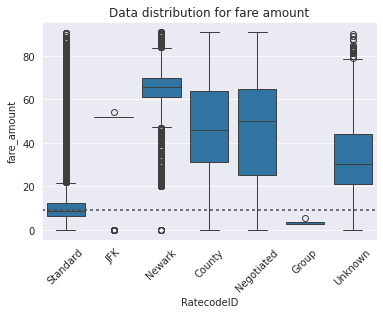

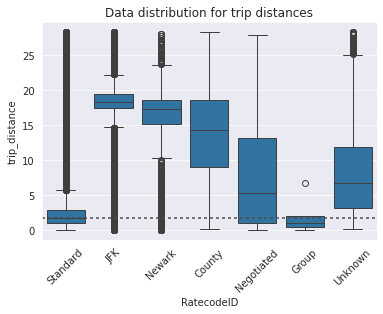

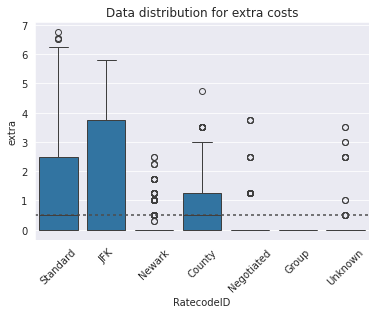

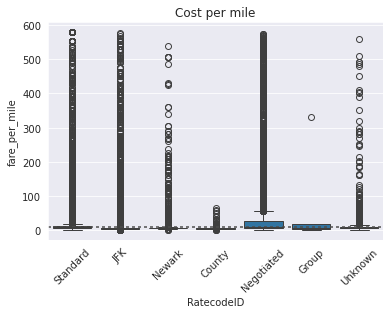

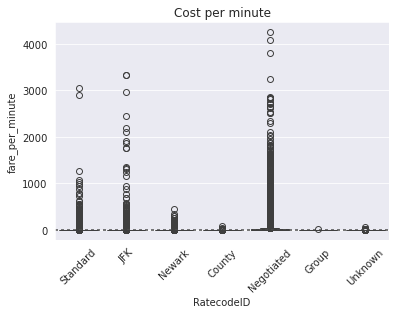

In [27]:
ax = sns.boxplot(cleandata, x='RatecodeID', y='fare_amount')
ax.tick_params(axis='x', labelrotation=45)
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(rate_label)
ax.axhline(cleandata['fare_amount'].median(), color=".3", dashes=(2, 2))
_ = plt.title('Data distribution for fare amount')
plt.show()

ax = sns.boxplot(cleandata, x='RatecodeID', y='trip_distance')
ax.tick_params(axis='x', labelrotation=45)
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(rate_label)
ax.axhline(cleandata['trip_distance'].median(), color=".3", dashes=(2, 2))
_ = plt.title('Data distribution for trip distances')
plt.show()

ax = sns.boxplot(cleandata, x='RatecodeID', y='extra')
ax.tick_params(axis='x', labelrotation=45)
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(rate_label)
ax.axhline(cleandata['extra'].median(), color=".3", dashes=(2, 2))
_ = plt.title('Data distribution for extra costs')
plt.show()

ax = sns.boxplot(cleandata, x='RatecodeID', y='fare_per_mile')
ax.tick_params(axis='x', labelrotation=45)
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(rate_label)
ax.axhline(cleandata['fare_per_mile'].median(), color=".3", dashes=(2, 2))
_ = plt.title('Cost per mile')
plt.show()

ax = sns.boxplot(cleandata, x='RatecodeID', y='fare_per_minute')
ax.tick_params(axis='x', labelrotation=45)
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(rate_label)
ax.axhline(cleandata['fare_per_minute'].median(), color=".3", dashes=(2, 2))
_ = plt.title('Cost per minute')
plt.show()


A histogram is a graphical representation that displays the distribution of a continuous or discrete numerical variable. It provides insights into the underlying data distribution and helps uncover patterns, frequencies, and ranges within the dataset. Here are some key uses and benefits of histogram plots:

  - Data Distribution: Histograms allow analysts to visualize the shape, central tendency, and spread of the data. They provide an overview of the data distribution, helping to identify if it follows a particular pattern, such as a normal distribution, skewed distribution, bimodal distribution, or multimodal distribution. Understanding the data distribution aids in selecting appropriate analysis techniques and understanding the characteristics of the data.

  - Frequency Analysis: Histograms display the frequency or count of data points within predefined bins or intervals along the x-axis. By observing the height or count of each bin, analysts can identify the frequency of occurrence for different values or value ranges. This information helps assess the concentration of data points and identify peaks or modes in the distribution.

  - Outlier Detection: Histograms can assist in identifying outliers, which are data points that significantly deviate from the rest of the distribution. Outliers may indicate data errors, unusual observations, or important anomalies requiring further investigation. By examining the tails or extreme values in the histogram, analysts can identify potential outliers that may require additional scrutiny.

  - Data Range and Spread: Histograms provide insights into the range and spread of the data. The x-axis represents the variable's values, while the y-axis represents the frequency or count of occurrences. By observing the width and span of the histogram, analysts can assess the data's range and variability. This information helps understand the data's spread and aids in subsequent analysis or decision-making processes.

  - Feature Engineering: Histograms can guide feature engineering processes by informing appropriate transformations, binning strategies, or encoding techniques for numerical variables. They assist in identifying nonlinear relationships or determining optimal cut-off points for converting continuous variables into categorical ones. Histograms also help identify data skewness and guide transformation methods to address the skew if necessary.

  - Data Quality Inspection: Histograms can be useful in detecting data quality issues or anomalies. Unusual spikes, gaps, or unexpected patterns in the histogram may indicate data entry errors, measurement inconsistencies, or missing data. By observing the histogram, analysts can identify potential data quality issues that require further investigation or preprocessing.

Your task is:

  1. Use Seaborn's [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) to explore the data distributions for fare_amount, trip_distance, and extra. Use kernel density estimators to better visualize the distribution. Use sampling if you run into any memory issues.

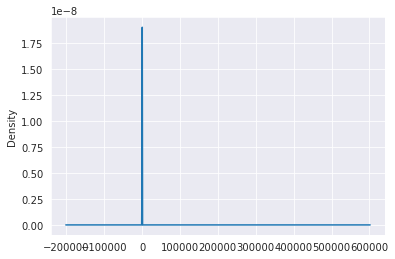

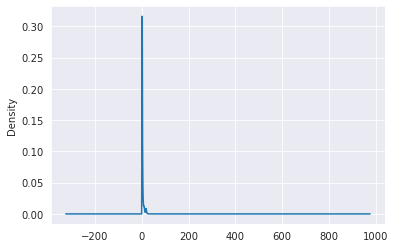

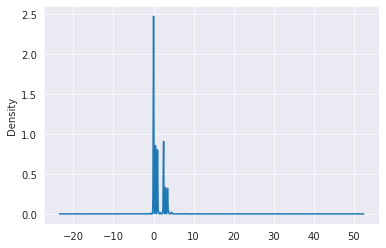

In [28]:
_ = tripdata['fare_amount'].plot.kde()
plt.show()
_ = tripdata['trip_distance'].plot.kde()
plt.show()
_ = tripdata['extra'].plot.kde()
plt.show()
#_ = tripdata['fare_per_mile'].plot.kde()
#plt.show()
#_ = tripdata['fare_per_minute'].plot.kde()
#plt.show()

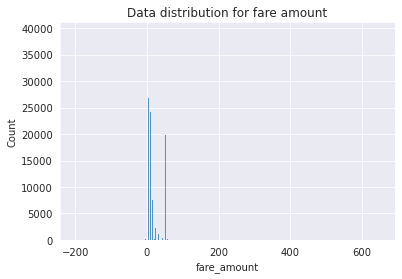

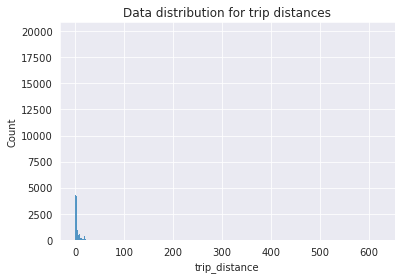

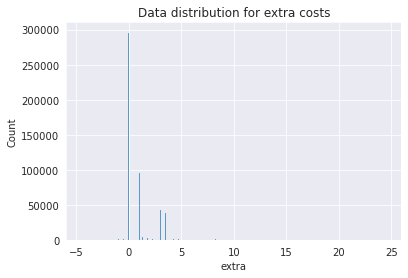

In [30]:
# Explore data distributions for 'fare_amount', 'trip_distance' and 'extra' using Seaborn's histplot.
# Sample the data if you run into memory issues.
histdata = tripdata.sample(frac=0.3, random_state=seed)

ax = sns.histplot(histdata, x='fare_amount', legend='auto')
_ = plt.title('Data distribution for fare amount')
plt.show()

ax = sns.histplot(histdata, x='trip_distance', legend='auto')
_ = plt.title('Data distribution for trip distances')
plt.show()

ax = sns.histplot(histdata, x='extra', legend='auto')
_ = plt.title('Data distribution for extra costs')
plt.show()

# ax = sns.histplot(tripdata, x='RatecodeID', y='fare_per_mile', legend='auto', hue='VendorID')
# ax.tick_params(axis='x', labelrotation=45)
# ax.set_xticks(ax.get_xticks())
# ax.set_xticklabels(rate_label)
# ax.axhline(tripdata['fare_per_mile'].median(), color=".3", dashes=(2, 2))
# _ = plt.title('Data distribution for Fare Cost per Mile')
# plt.show()
# 
# ax = sns.histplot(tripdata, x='RatecodeID', y='fare_per_minute', legend='auto', hue='VendorID')
# ax.tick_params(axis='x', labelrotation=45)
# ax.set_xticks(ax.get_xticks())
# ax.set_xticklabels(rate_label)
# ax.axhline(tripdata['fare_per_minute'].median(), color=".3", dashes=(2, 2))
# _ = plt.title('Data distribution for Fare Cost per Minute of the trip')
# plt.show()


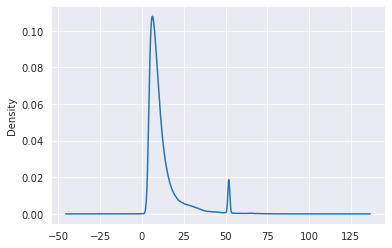

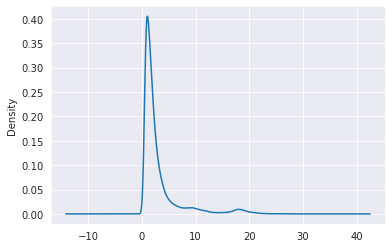

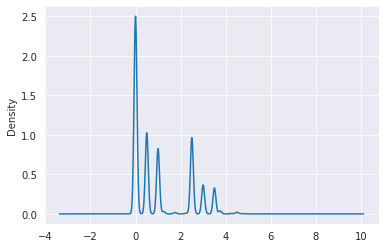

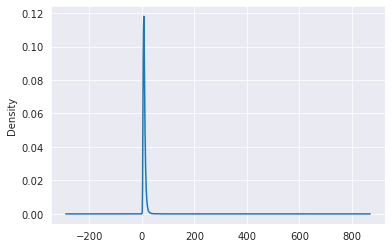

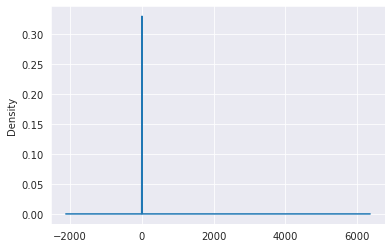

In [31]:
_ = cleandata['fare_amount'].plot.kde()
plt.show()
_ = cleandata['trip_distance'].plot.kde()
plt.show()
_ = cleandata['extra'].plot.kde()
plt.show()
_ = cleandata['fare_per_mile'].plot.kde()
plt.show()
_ = cleandata['fare_per_minute'].plot.kde()
plt.show()

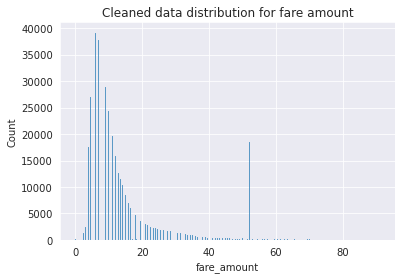

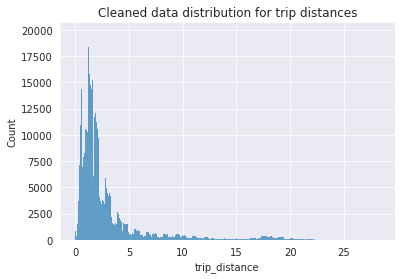

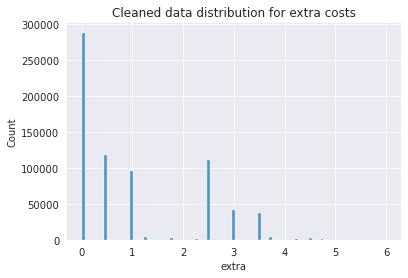

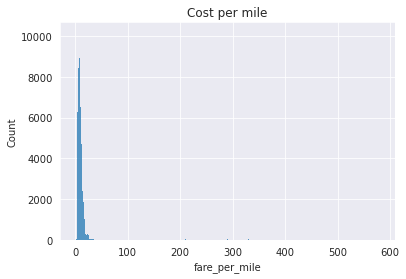

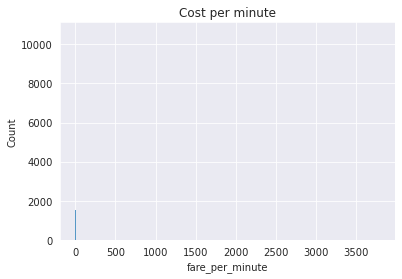

In [32]:
hist_cleandata = cleandata.sample(frac=0.3, random_state=seed)

ax = sns.histplot(hist_cleandata, x='fare_amount')
_ = plt.title('Cleaned data distribution for fare amount')
plt.show()

ax = sns.histplot(hist_cleandata, x='trip_distance')
_ = plt.title('Cleaned data distribution for trip distances')
plt.show()

ax = sns.histplot(hist_cleandata, x='extra')
_ = plt.title('Cleaned data distribution for extra costs')
plt.show()

ax = sns.histplot(hist_cleandata, x='fare_per_mile')
_ = plt.title('Cost per mile')
plt.show()

ax = sns.histplot(hist_cleandata, x='fare_per_minute')
_ = plt.title('Cost per minute')
plt.show()
